C:\Users\Babar Raheem\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Null entries in each column:
Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


C:\Users\Babar Raheem\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Model accuracy: 0.5495657614291128


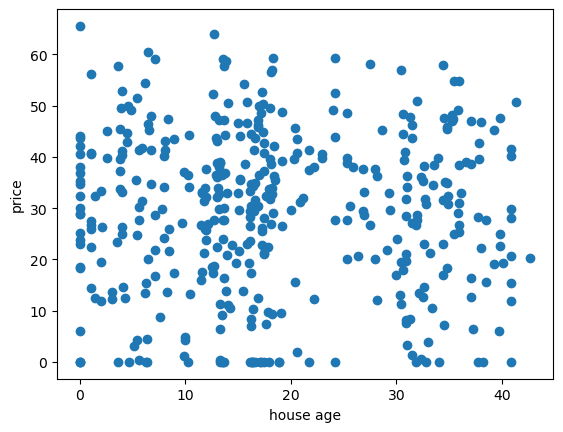

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Real_Estate.csv")
data.head(1)

#data preprocessing

#check for duplicate
data_dup = data.duplicated()
data_dup
#handing duplicate
data = data.drop_duplicates()

#check for null value

# Check for null entries in each column
null_counts = data.isnull().sum()
#or total missing values
# null_counts = sum(data.isnull().sum())
print("Null entries in each column:")
print(null_counts)

# Define features and target variable

x = data.loc[:,['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude']]
x.head()


# we can also do this
# X = data.drop(columns=['Price'])  # 'Price' is the target variable
# y = data['Price']

y = data.loc[:,['House price of unit area']]

#to ploat the price and area of plot before removing outliers
plt.scatter(x["House age"],y)
plt.xlabel("house age")
plt.ylabel("price")

#lets handle null values
#handling null values
x = x.fillna(x.median())
y = y.fillna(y.median())


##to splite the dataset into train and test
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)   

#to standarized data
'''
important note regarding standarizing data
he recommended approach is to normalize the data
after splitting it into training and testing sets. The rationale behind this recommendation is to prevent a
any nformation leakage from the testing set into the training set,
which can lead to over-optimistic results and unrealistic performance evaluations.
'''
scalar = StandardScaler() 

X_train_normalized = scalar.fit_transform(X_train)
X_test_normalized = scalar.transform(X_test)


#important note
'''
fit_transform(): Computes the statistics (e.g., mean, standard deviation) and applies the transformation to the training data.
transform(): Applies the same transformation (using the statistics computed from the training data) to the test data.
This ensures that the model is evaluated on data that is transformed consistently with the training data, avoiding data leakage and ensuring fair evaluation.

'''

# Convert normalized data back to DataFrame for easier plotting (optional)
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns = X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)


lr = linear_model.LinearRegression()

model = lr.fit(X_train_normalized,Y_train)
predications = model.predict(X_test_normalized)

#to check the accuracy 
model.score(X_test_normalized,Y_test)

model.predict(X_train_normalized)
model.predict(X_test)

# Check the accuracy
accuracy = model.score(X_test_normalized, Y_test)
print(f"Model accuracy: {accuracy}")




In [2]:


data = pd.read_csv("Real_Estate.csv")
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [9]:

# New data point
new_data_point = pd.DataFrame({
    'House age': [13.3],
    'Distance to the nearest MRT station': [4082.0150],
    'Number of convenience stores': [8],
    'Latitude': [25.007059],
    'Longitude': [121.561694]
})

# Normalize the new data point
new_data_point_normalized = scalar.transform(new_data_point)

# Predict the price
predicted_price = model.predict(new_data_point_normalized)
print(f"Predicted Price: {predicted_price[0][0]}")

Predicted Price: 11.096875086252876


     House age  Distance to the nearest MRT station  \
192       13.3                           2147.37600   
234       19.2                             90.45606   
5         13.3                            279.17260   
45         8.0                            405.21340   
245       37.1                           1559.82700   
..         ...                                  ...   
71        12.0                           2408.99300   
106        4.5                            579.20830   
270       30.4                            444.13340   
348       20.0                            552.43710   
102       34.9                           2185.12800   

     Number of convenience stores   Latitude   Longitude  
192                             3  24.933732  121.564450  
234                             5  24.986418  121.478117  
5                               2  24.994994  121.543823  
45                              4  24.993687  121.529953  
245                             4  24.957858

Train RMSE: 10.692659598431085
Test RMSE: 11.30541356274437
Train MAE: 9.08242754728476
Test MAE: 9.69668487082455
Model Accuracy: 0.5379865328391642
Predicted Price: [11.19853331]
